In [1]:
import numpy as np
from matplotlib import pyplot as plt 

### Plotting settings 
#plt.rc('figure', dpi=100)
#plt.rc('figure',figsize=(4,1.7))
#plt.rc('font', family = 'Times New Roman')
#plt.rc('font', size = 14)
#plt.rc('text', usetex=True)
#plt.rc('xtick', labelsize=14)
#plt.rc('ytick', labelsize=14)
#plt.rc('axes', labelsize=18)
#plt.rc('lines', linewidth=2.5)

In [2]:
def A1g(qx,qy):
    return 0.5*np.cos(qx) + 0.5*np.cos(qy)

In [4]:
Nqs = 30
qs = np.linspace(-np.pi,np.pi,Nqs)
qxs,qys = np.meshgrid(qs,qs)

In [80]:
### Now we set up the self-consistent Born equation for the magnon spectrum 
### This is given by the solution to 
def scba(A1g,f0,threshold = 1.e-5,epsilon = 0.2):
    zero = 1.e-6

    def scba_function(f):
        integral1 = np.mean( ( np.ones_like(f) - A1g*f)/np.sqrt(np.ones_like(f) - f**2 + zero) )
        integral2 = np.mean( np.ones_like(f)/np.sqrt(np.ones_like(f) - f**2 + zero) )
        
        df = -f-( f*np.sqrt(np.ones_like(f) - f**2)*integral1 + (2. - integral2)*(A1g - f)*np.sqrt(np.ones_like(f) - f**2) )

        return f + epsilon*df 
        
    f1 = scba_function(f0)
    
    err = np.sum(np.abs(f1-f0) )/epsilon
    print(err)
    while err > threshold:
        f1 = scba_function(f0)
        err = np.sum(np.abs(f1-f0))
        print(err)
        f0 = f1 

    return f1
    




In [81]:
f0 = A1g(qxs,qys)

In [89]:
f = scba(f0,f0,2.e-4)

585.5489020706412
117.10978041412827
107.5857338299073
96.65818642980125
83.1079765904652
67.273247870428
50.66427242353903
35.338595409169585
22.936564654888368
14.038632287012478
8.249869326592298
4.737128202093542
2.695331217499434
1.5349413920709312
0.8809850323226224
0.5121049116577127
0.3025328435866166
0.18207425159435386
0.11178892947101557
0.07041541305360167
0.046759680619825605
0.03190992277388641
0.02209481351618104
0.015454428790765983
0.01088042202747163
0.007689790883898255
0.005448236903946503
0.003873675244361885
0.002760607731239033
0.00197034376463856
0.001407118697217484
0.0010059287216815684
0.0007201364819271125
0.000515847291360845
0.0003696698524237735
0.0002650597987157721
0.0001902301743644877


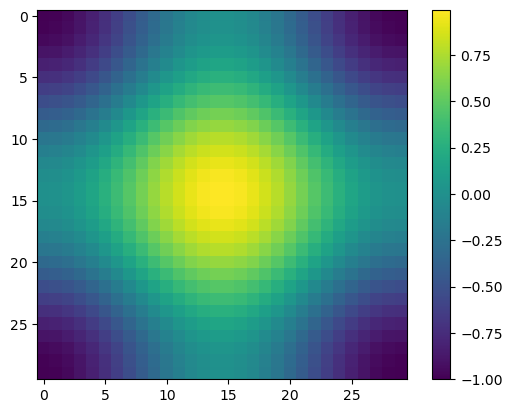

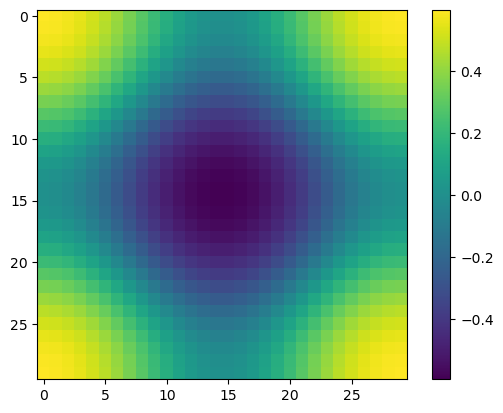

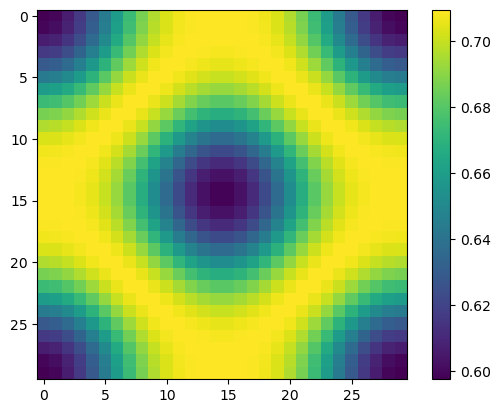

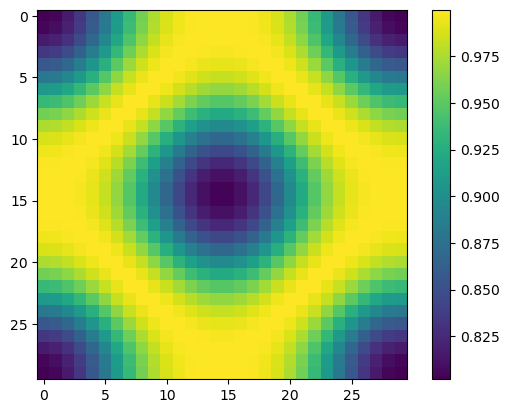

In [93]:
plt.imshow(f0)
plt.colorbar()
plt.show()
plt.imshow(f)
plt.colorbar()
plt.show()
plt.imshow(-f/f0)
plt.colorbar()
plt.show()
plt.imshow(np.sqrt(np.ones_like(f) - f**2))
plt.colorbar()
plt.show()